In [1]:
pip install tensorflow matplotlib keras scikit-learn streamlit seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Unzip the dataset

zip_path = "/content/drive/MyDrive/Fish_Classification_Project/Dataset.zip"
output_path = "/content/fish_dataset"

import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_path)

print(f"Dataset unzipped to: {output_path}")

Dataset unzipped to: /content/fish_dataset


In [4]:
#print folders
import os

base_path = "/content/fish_dataset"

for root, dirs, files in os.walk(base_path):
    print("📁 Folder:", root)
    for d in dirs:
        print("   └──", d)



📁 Folder: /content/fish_dataset
   └── images.cv_jzk6llhf18tm3k0kyttxz
📁 Folder: /content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz
   └── data
📁 Folder: /content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data
   └── test
   └── val
   └── train
📁 Folder: /content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test
   └── fish sea_food sea_bass
   └── fish sea_food black_sea_sprat
   └── fish sea_food gilt_head_bream
   └── fish sea_food red_sea_bream
   └── animal fish
   └── fish sea_food trout
   └── fish sea_food hourse_mackerel
   └── fish sea_food red_mullet
   └── fish sea_food striped_red_mullet
   └── animal fish bass
   └── fish sea_food shrimp
📁 Folder: /content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food sea_bass
📁 Folder: /content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat
📁 Folder: /content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food gilt_head_bream
📁 Folder: /content/fish

In [5]:
classes = os.listdir(output_path)
print("Fish classes found:", classes)

Fish classes found: ['images.cv_jzk6llhf18tm3k0kyttxz']


In [6]:
import os

# Base path to train, val, and test
base_path = "/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"
splits = ["train", "val", "test"]

for split in splits:
    split_path = os.path.join(base_path, split)
    for folder in os.listdir(split_path):
        old_folder = os.path.join(split_path, folder)
        new_folder_name = folder.replace(" ", "_")
        new_folder = os.path.join(split_path, new_folder_name)
        if old_folder != new_folder:
            os.rename(old_folder, new_folder)

print("Folder names cleaned (spaces replaced with underscores).")


Folder names cleaned (spaces replaced with underscores).


In [7]:
#Load Data sets
import tensorflow as tf

# Updated paths after renaming
train_dir = '/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
val_dir = '/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
test_dir = '/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'

img_size = (224, 224)
batch_size = 32

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Check class names
class_names = train_ds.class_names
print("Classes:", class_names)


Found 6225 files belonging to 11 classes.
Found 1092 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.
Classes: ['animal_fish', 'animal_fish_bass', 'fish_sea_food_black_sea_sprat', 'fish_sea_food_gilt_head_bream', 'fish_sea_food_hourse_mackerel', 'fish_sea_food_red_mullet', 'fish_sea_food_red_sea_bream', 'fish_sea_food_sea_bass', 'fish_sea_food_shrimp', 'fish_sea_food_striped_red_mullet', 'fish_sea_food_trout']


In [8]:
#Optimize the performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


🔖 Class Names: ['animal_fish', 'animal_fish_bass', 'fish_sea_food_black_sea_sprat', 'fish_sea_food_gilt_head_bream', 'fish_sea_food_hourse_mackerel', 'fish_sea_food_red_mullet', 'fish_sea_food_red_sea_bream', 'fish_sea_food_sea_bass', 'fish_sea_food_shrimp', 'fish_sea_food_striped_red_mullet', 'fish_sea_food_trout']


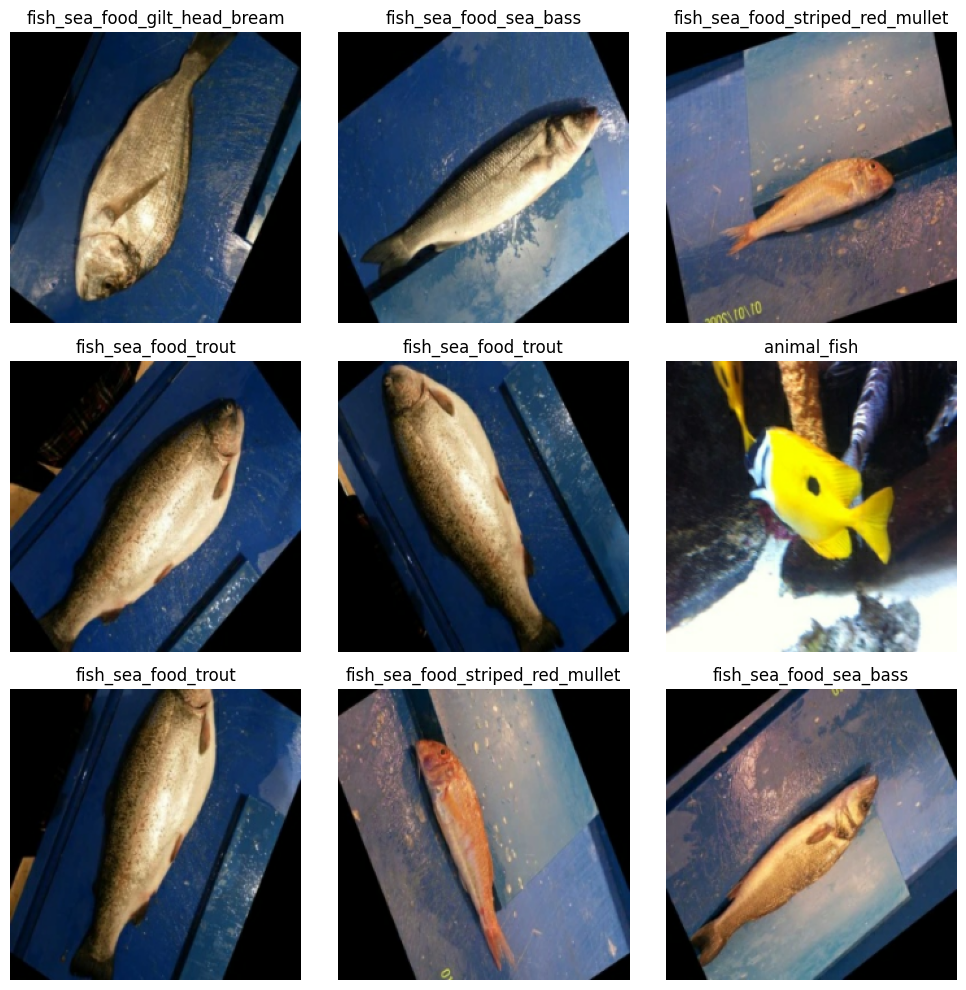

In [9]:
import matplotlib.pyplot as plt

# Fetch one batch from the train dataset
image_batch, label_batch = next(iter(train_ds))

print("🔖 Class Names:", class_names)

# Plot first 9 images in the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras import layers

# Data Augmentation Layer (for training only)
data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),                    # Normalize to [0,1]
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.1)
])

# Rescaling Layer (for validation and test data)
rescale_only = tf.keras.Sequential([
    layers.Rescaling(1./255)
])


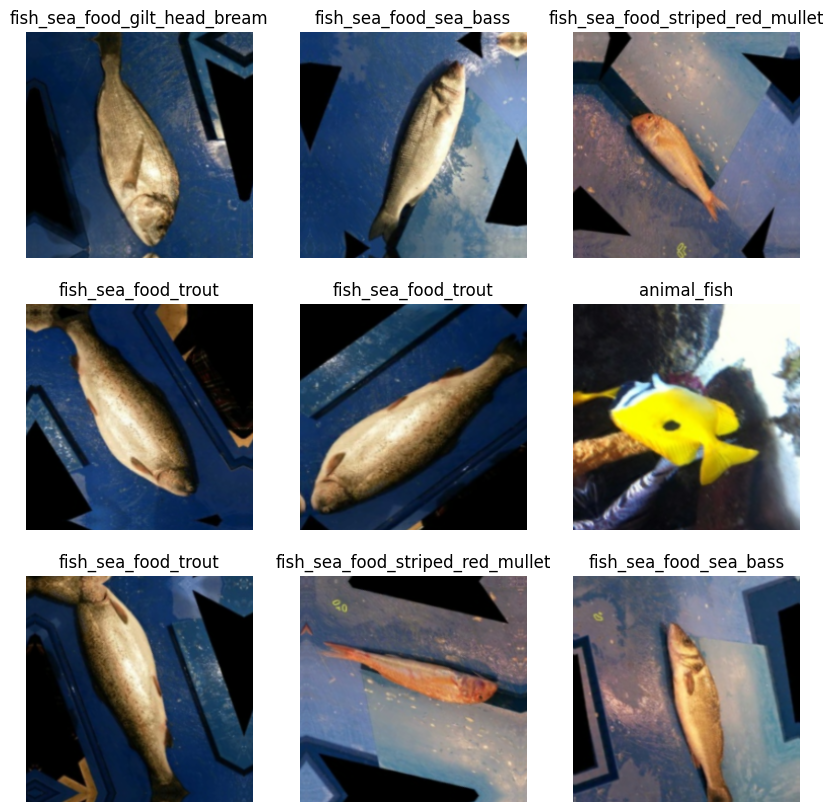

In [11]:
#Apply layers in model
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image_batch[i:i+1])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy())
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [12]:
#CNN Model from Scratch
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    data_augmentation,  # Augment + Rescale

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (1, 224, 224, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (1, 222, 222, 32)      │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (1, 111, 111, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (1, 109, 109, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (1, 54, 54, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 52, 52, 128)       │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 26, 26, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 86528)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 128)               │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 11)                │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=9
)


Epoch 1/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.7822 - loss: 0.5867 - val_accuracy: 0.9020 - val_loss: 0.3070
Epoch 2/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8150 - loss: 0.5143 - val_accuracy: 0.9267 - val_loss: 0.2800
Epoch 3/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.8191 - loss: 0.4994 - val_accuracy: 0.9222 - val_loss: 0.2519
Epoch 4/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.8353 - loss: 0.4738 - val_accuracy: 0.9011 - val_loss: 0.3961
Epoch 5/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8526 - loss: 0.4132 - val_accuracy: 0.9240 - val_loss: 0.2348
Epoch 6/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8559 - loss: 0.4157 - val_accuracy: 0.9542 - val_loss: 0.1696
Epoch 7/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8709 - loss: 0.3544 - val_accuracy: 0.9396 - val_loss: 0.2074
Epoch 8/9
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8732 - loss: 0.3513 - val_accu

In [15]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f" Test Accuracy: {test_acc:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9683 - loss: 0.1156
 Test Accuracy: 96.80%


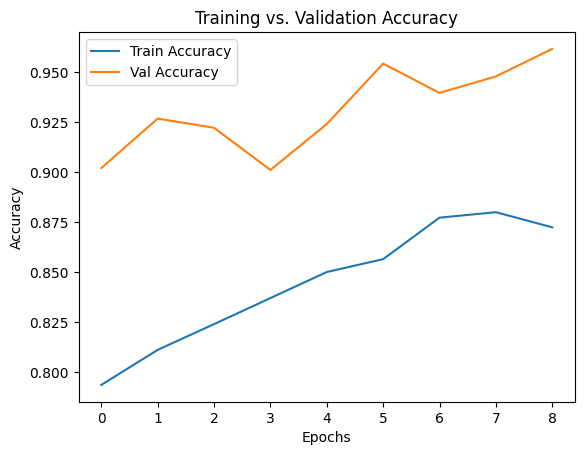

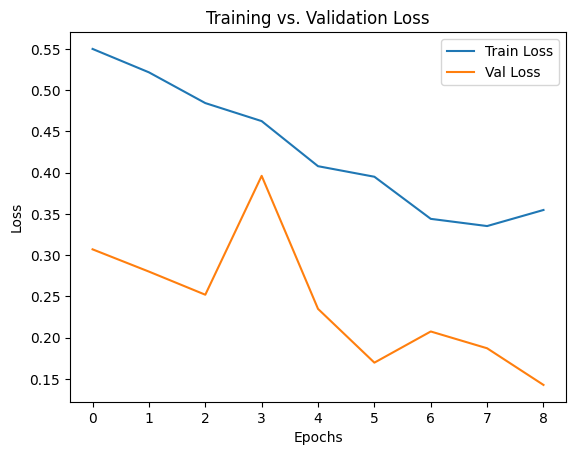

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()


In [17]:
model.save("fish_cnn_model.h5")
print(" Model saved as 'fish_cnn_model.h5'")


 Model saved as 'fish_cnn_model.h5'


In [18]:
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import preprocess_input

data_augmentation_resnet = tf.keras.Sequential([
    layers.Lambda(preprocess_input),      #  Rescales pixel values to [0, 1]
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


In [20]:
from tensorflow.keras.applications import ResNet50

from tensorflow.keras import layers, models

input_shape = (224, 224, 3)

# Load ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Freeze the base

# Build the model
resnet_model = models.Sequential([
    data_augmentation_resnet,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Model summary
resnet_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:
history_resnet = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)


Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 44s 177ms/step - accuracy: 0.6548 - loss: 1.0936 - val_accuracy: 0.9817 - val_loss: 0.0832
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 152ms/step - accuracy: 0.9363 - loss: 0.1972 - val_accuracy: 0.9890 - val_loss: 0.0421
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.9609 - loss: 0.1264 - val_accuracy: 0.9890 - val_loss: 0.0308
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.9732 - loss: 0.0872 - val_accuracy: 0.9945 - val_loss: 0.0267
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.9776 - loss: 0.0734 - val_accuracy: 0.9927 - val_loss: 0.0237
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.9746 - loss: 0.0837 - val_accuracy: 0.9927 - val_loss: 0.0245
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.9845 - loss: 0.0493 - val_accuracy: 0.9881 - val_loss: 0.0273
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.9820 - loss: 0.0531 - 

In [22]:
# Evaluate on test data
test_loss_resnet, test_acc_resnet = resnet_model.evaluate(test_ds)
print(f" ResNet50 Test Accuracy: {test_acc_resnet:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9967 - loss: 0.0090
 ResNet50 Test Accuracy: 99.44%


In [23]:
# Unfreeze the base model
base_model.trainable = True

# Let's fine-tune the top 30 layers
for layer in base_model.layers[:-30]:
    layer.trainable = False

print(" Last 30 layers of ResNet50 are now trainable.")


 Last 30 layers of ResNet50 are now trainable.


In [24]:
from tensorflow.keras.optimizers import Adam

resnet_model.compile(optimizer=Adam(1e-5),  # Lower LR for fine-tuning
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [25]:
# Continue training (fine-tuning)
fine_tune_epochs = 7

history_finetuned = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs
)


Epoch 1/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 58s 219ms/step - accuracy: 0.7127 - loss: 1.5278 - val_accuracy: 0.9918 - val_loss: 0.0310
Epoch 2/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.9600 - loss: 0.1379 - val_accuracy: 0.9954 - val_loss: 0.0123
Epoch 3/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accuracy: 0.9945 - val_loss: 0.0116
Epoch 4/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.9843 - loss: 0.0448 - val_accuracy: 0.9963 - val_loss: 0.0082
Epoch 5/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9897 - loss: 0.0366 - val_accuracy: 0.9973 - val_loss: 0.0086
Epoch 6/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.9940 - loss: 0.0245 - val_accuracy: 0.9963 - val_loss: 0.0098
Epoch 7/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.9948 - loss: 0.0196 - val_accuracy: 0.9963 - val_loss: 0.0089


In [26]:
# Evaluate again after fine-tuning
test_loss_ft, test_acc_ft = resnet_model.evaluate(test_ds)
print(f"Fine-Tuned ResNet50 Test Accuracy: {test_acc_ft:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.9987 - loss: 0.0042
Fine-Tuned ResNet50 Test Accuracy: 99.84%


In [27]:
#Save the Fine-Tuned Model
resnet_model.save("resnet50_fish_finetuned.h5")
print(" Saved as 'resnet50_fish_finetuned.h5'")

 Saved as 'resnet50_fish_finetuned.h5'


In [28]:
#VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

data_augmentation_vgg = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Lambda(preprocess_input)
])


In [29]:
# Load pretrained VGG16
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  # Freeze base


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [30]:
vgg_model = models.Sequential([
    data_augmentation_vgg,
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])


In [31]:
vgg_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [32]:
history_vgg = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)

Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 46s 207ms/step - accuracy: 0.4466 - loss: 2.7455 - val_accuracy: 0.9359 - val_loss: 0.2766
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.8418 - loss: 0.4638 - val_accuracy: 0.9789 - val_loss: 0.1012
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.9041 - loss: 0.2771 - val_accuracy: 0.9808 - val_loss: 0.0670
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.9328 - loss: 0.2004 - val_accuracy: 0.9817 - val_loss: 0.0688
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.9485 - loss: 0.1492 - val_accuracy: 0.9835 - val_loss: 0.0563
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.9572 - loss: 0.1315 - val_accuracy: 0.9899 - val_loss: 0.0373
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.9631 - loss: 0.1082 - val_accuracy: 0.9899 - val_loss: 0.0290
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.9630 - loss: 0.1022 - 

In [33]:
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(test_ds)
print(f" VGG16 Test Accuracy: {test_acc_vgg:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9895 - loss: 0.0347
 VGG16 Test Accuracy: 98.65%


In [34]:
# Unfreeze the base model
vgg_base.trainable = True

# fine-tune the last 4 convolutional blocks
for layer in vgg_base.layers[:-4 * 4]:  # Each block has about 4 layers
    layer.trainable = False

print("Unfroze the top convolutional block(s) of VGG16.")


Unfroze the top convolutional block(s) of VGG16.


In [35]:
from tensorflow.keras.optimizers import Adam

vgg_model.compile(optimizer=Adam(1e-5),  # Low LR
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [36]:

fine_tune_epochs = 7

history_vgg_finetuned = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs
)


Epoch 1/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 450ms/step - accuracy: 0.9598 - loss: 0.1227 - val_accuracy: 0.9771 - val_loss: 0.0637
Epoch 2/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.9758 - loss: 0.0824 - val_accuracy: 0.9927 - val_loss: 0.0303
Epoch 3/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 407ms/step - accuracy: 0.9858 - loss: 0.0346 - val_accuracy: 0.9908 - val_loss: 0.0216
Epoch 4/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 405ms/step - accuracy: 0.9928 - loss: 0.0253 - val_accuracy: 0.9872 - val_loss: 0.0338
Epoch 5/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 407ms/step - accuracy: 0.9903 - loss: 0.0265 - val_accuracy: 0.9918 - val_loss: 0.0197
Epoch 6/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 432ms/step - accuracy: 0.9890 - loss: 0.0351 - val_accuracy: 0.9963 - val_loss: 0.0121
Epoch 7/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 410ms/step - accuracy: 0.9932 - loss: 0.0198 - val_accuracy: 0.9973 - val_loss: 0.0135


In [37]:
test_loss_vgg_ft, test_acc_vgg_ft = vgg_model.evaluate(test_ds)
print(f"📈 Fine-Tuned VGG16 Test Accuracy: {test_acc_vgg_ft:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.9987 - loss: 0.0038
📈 Fine-Tuned VGG16 Test Accuracy: 99.81%


In [38]:
vgg_model.save("vgg16_fish_finetuned.h5")
print(" Saved as 'vgg16_fish_finetuned.h5'")


 Saved as 'vgg16_fish_finetuned.h5'


In [39]:
#MobileNet
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras import layers, models

data_augmentation_mobilenet = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Lambda(preprocess_input)
])


In [40]:
mobilenet_base = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
mobilenet_base.trainable = False  # Start with frozen base


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [41]:
mobilenet_model = models.Sequential([
    data_augmentation_mobilenet,
    mobilenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])


In [42]:
mobilenet_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [43]:
history_mobilenet = mobilenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)

Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.5600 - loss: 1.3819 - val_accuracy: 0.9707 - val_loss: 0.1417
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.9129 - loss: 0.2953 - val_accuracy: 0.9881 - val_loss: 0.0667
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9431 - loss: 0.1856 - val_accuracy: 0.9872 - val_loss: 0.0525
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9629 - loss: 0.1175 - val_accuracy: 0.9908 - val_loss: 0.0375
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9673 - loss: 0.0997 - val_accuracy: 0.9890 - val_loss: 0.0345
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.9735 - loss: 0.0819 - val_accuracy: 0.9927 - val_loss: 0.0242
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9764 - loss: 0.0715 - val_accuracy: 0.9945 - val_loss: 0.0223
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9796 - loss: 0.0625 - val_accu

In [44]:
test_loss_mob, test_acc_mob = mobilenet_model.evaluate(test_ds)
print(f" MobileNet Test Accuracy: {test_acc_mob:.2%}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9961 - loss: 0.0143
 MobileNet Test Accuracy: 99.59%


In [45]:
mobilenet_base.trainable = True  # Unfreeze all layers

#fine-tune the top 30 layers
for layer in mobilenet_base.layers[:-30]:
    layer.trainable = False

print("✅ Top 30 layers of MobileNet are now trainable.")


✅ Top 30 layers of MobileNet are now trainable.


In [46]:
from tensorflow.keras.optimizers import Adam

mobilenet_model.compile(
    optimizer=Adam(1e-5),  # Low LR for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [47]:

fine_tune_epochs = 7

history_mobilenet_ft = mobilenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs
)


Epoch 1/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 105ms/step - accuracy: 0.4141 - loss: 5.1744 - val_accuracy: 0.9780 - val_loss: 0.0893
Epoch 2/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.8327 - loss: 0.8090 - val_accuracy: 0.9853 - val_loss: 0.0813
Epoch 3/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9267 - loss: 0.2940 - val_accuracy: 0.9881 - val_loss: 0.0586
Epoch 4/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9510 - loss: 0.1910 - val_accuracy: 0.9918 - val_loss: 0.0380
Epoch 5/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.9572 - loss: 0.1685 - val_accuracy: 0.9936 - val_loss: 0.0262
Epoch 6/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.9643 - loss: 0.1215 - val_accuracy: 0.9936 - val_loss: 0.0193
Epoch 7/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9738 - loss: 0.0823 - val_accuracy: 0.9954 - val_loss: 0.0137


In [48]:
test_loss_mob_ft, test_acc_mob_ft = mobilenet_model.evaluate(test_ds)
print(f" Fine-Tuned MobileNet Test Accuracy: {test_acc_mob_ft:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9988 - loss: 0.0083
 Fine-Tuned MobileNet Test Accuracy: 99.84%


In [49]:
mobilenet_model.save("mobilenet_fish_finetuned.h5")
print(" Saved as 'mobilenet_fish_finetuned.h5'")


 Saved as 'mobilenet_fish_finetuned.h5'


In [50]:
#InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras import layers, models

data_augmentation_inception = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Lambda(preprocess_input)
])


In [51]:
inception_base = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
inception_base.trainable = False  # Start frozen

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [52]:
inception_model = models.Sequential([
    data_augmentation_inception,
    inception_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])


In [53]:
inception_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [54]:

history_inception = inception_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)

Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 34s 124ms/step - accuracy: 0.5488 - loss: 1.3901 - val_accuracy: 0.9139 - val_loss: 0.3135
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8499 - loss: 0.4653 - val_accuracy: 0.9496 - val_loss: 0.1781
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.8929 - loss: 0.3360 - val_accuracy: 0.9423 - val_loss: 0.1627
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8987 - loss: 0.2948 - val_accuracy: 0.9451 - val_loss: 0.1451
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9100 - loss: 0.2712 - val_accuracy: 0.9615 - val_loss: 0.1137
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9149 - loss: 0.2470 - val_accuracy: 0.9753 - val_loss: 0.0899
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9272 - loss: 0.2133 - val_accuracy: 0.9725 - val_loss: 0.0857
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9255 - loss: 0.2048 - val_ac

In [55]:
test_loss_inc, test_acc_inc = inception_model.evaluate(test_ds)
print(f"InceptionV3 Test Accuracy: {test_acc_inc:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9767 - loss: 0.0697
InceptionV3 Test Accuracy: 97.58%


In [57]:
# Unfreeze the entire base model
inception_base.trainable = True

# fine-tune the top 30 layers
for layer in inception_base.layers[:-30]:
    layer.trainable = False

print(" Top 30 layers of InceptionV3 are now trainable.")


 Top 30 layers of InceptionV3 are now trainable.


In [58]:
from tensorflow.keras.optimizers import Adam

inception_model.compile(
    optimizer=Adam(1e-5),  # Low LR
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [59]:

fine_tune_epochs = 7

history_inception_ft = inception_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs
)


Epoch 1/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - accuracy: 0.5788 - loss: 1.8345 - val_accuracy: 0.9707 - val_loss: 0.0988
Epoch 2/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 38s 112ms/step - accuracy: 0.8774 - loss: 0.3894 - val_accuracy: 0.9753 - val_loss: 0.0954
Epoch 3/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.9210 - loss: 0.2656 - val_accuracy: 0.9771 - val_loss: 0.0804
Epoch 4/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.9273 - loss: 0.2193 - val_accuracy: 0.9780 - val_loss: 0.0705
Epoch 5/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.9445 - loss: 0.1900 - val_accuracy: 0.9808 - val_loss: 0.0641
Epoch 6/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.9556 - loss: 0.1437 - val_accuracy: 0.9817 - val_loss: 0.0589
Epoch 7/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - accuracy: 0.9545 - loss: 0.1336 - val_accuracy: 0.9817 - val_loss: 0.0539


In [60]:
test_loss_inc_ft, test_acc_inc_ft = inception_model.evaluate(test_ds)
print(f" Fine-Tuned InceptionV3 Test Accuracy: {test_acc_inc_ft:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9879 - loss: 0.0360
 Fine-Tuned InceptionV3 Test Accuracy: 98.93%


In [61]:
inception_model.save("inceptionv3_fish_finetuned.h5")
print(" Saved as 'inceptionv3_fish_finetuned.h5'")


 Saved as 'inceptionv3_fish_finetuned.h5'


In [62]:
#EfficientNetB0
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras import layers, models

data_augmentation_effnet = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Lambda(preprocess_input)
])


In [63]:
effnet_base = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
effnet_base.trainable = False  # Start with base frozen


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [64]:
effnet_model = models.Sequential([
    data_augmentation_effnet,
    effnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])


In [65]:
effnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [66]:
history_effnet = effnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)

Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 108ms/step - accuracy: 0.6962 - loss: 0.9815 - val_accuracy: 0.9762 - val_loss: 0.0923
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9626 - loss: 0.1417 - val_accuracy: 0.9853 - val_loss: 0.0479
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.9718 - loss: 0.0887 - val_accuracy: 0.9908 - val_loss: 0.0312
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.9845 - loss: 0.0563 - val_accuracy: 0.9890 - val_loss: 0.0358
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9886 - loss: 0.0417 - val_accuracy: 0.9890 - val_loss: 0.0227
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9893 - loss: 0.0371 - val_accuracy: 0.9908 - val_loss: 0.0267
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.9921 - loss: 0.0341 - val_accuracy: 0.9927 - val_loss: 0.0216
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.9895 - loss: 0.0326 - val_acc

In [67]:
test_loss_eff, test_acc_eff = effnet_model.evaluate(test_ds)
print(f" EfficientNetB0 Test Accuracy: {test_acc_eff:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9960 - loss: 0.0115
 EfficientNetB0 Test Accuracy: 99.62%


In [69]:
# Unfreeze the EfficientNet base
effnet_base.trainable = True

# fine-tune the top 30 layers
for layer in effnet_base.layers[:-30]:
    layer.trainable = False

print(" Top 30 layers of EfficientNetB0 are now trainable.")


 Top 30 layers of EfficientNetB0 are now trainable.


In [70]:
from tensorflow.keras.optimizers import Adam

effnet_model.compile(
    optimizer=Adam(1e-5),  # Lower LR for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [71]:

fine_tune_epochs = 7

history_effnet_ft = effnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs
)


Epoch 1/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.8929 - loss: 0.3375 - val_accuracy: 0.9927 - val_loss: 0.0279
Epoch 2/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9694 - loss: 0.1295 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 3/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9772 - loss: 0.0956 - val_accuracy: 0.9890 - val_loss: 0.0306
Epoch 4/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9827 - loss: 0.0716 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 5/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9873 - loss: 0.0572 - val_accuracy: 0.9908 - val_loss: 0.0272
Epoch 6/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.9901 - loss: 0.0504 - val_accuracy: 0.9918 - val_loss: 0.0257
Epoch 7/7
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9885 - loss: 0.0447 - val_accuracy: 0.9918 - val_loss: 0.0235


In [72]:
test_loss_eff_ft, test_acc_eff_ft = effnet_model.evaluate(test_ds)
print(f" Fine-Tuned EfficientNetB0 Test Accuracy: {test_acc_eff_ft:.2%}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9968 - loss: 0.0124
 Fine-Tuned EfficientNetB0 Test Accuracy: 99.62%


In [73]:
effnet_model.save("efficientnetb0_fish_finetuned.h5")
print("Saved as 'efficientnetb0_fish_finetuned.h5'")


Saved as 'efficientnetb0_fish_finetuned.h5'


In [74]:
#Collect Test Accuracies
model_accuracies = {
    "CNN from Scratch": test_acc,
    "ResNet50 Fine-Tuned": test_acc_ft,
    "VGG16 Fine-Tuned": test_acc_vgg_ft,
    "MobileNet Fine-Tuned": test_acc_mob_ft,
    "InceptionV3 Fine-Tuned": test_acc_inc_ft,
    "EfficientNetB0 Fine-Tuned": test_acc_eff_ft
}


/tmp/ipython-input-75-403221075.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


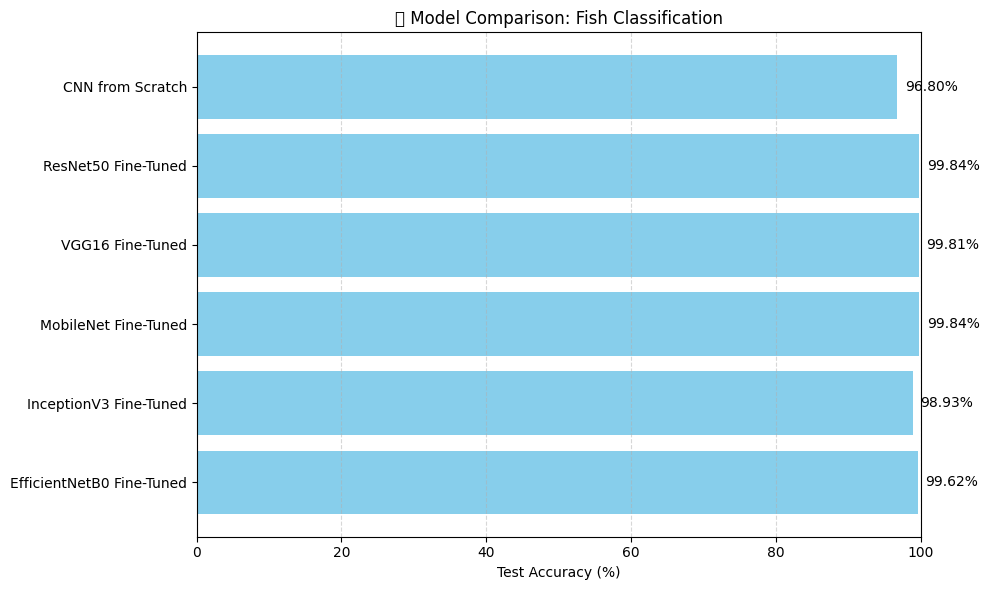

In [75]:
import matplotlib.pyplot as plt

# Extract data
models = list(model_accuracies.keys())
accuracies = [v * 100 for v in model_accuracies.values()]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color='skyblue')
plt.xlabel("Test Accuracy (%)")
plt.title("🔍 Model Comparison: Fish Classification")

# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%", va='center', fontsize=10)

plt.xlim(0, 100)
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [76]:
import pandas as pd

# Create leaderboard using your actual variables
model_accuracies = {
    "EfficientNetB0 Fine-Tuned": test_acc_eff_ft * 100,
    "InceptionV3 Fine-Tuned": test_acc_inc_ft * 100,
    "MobileNet Fine-Tuned": test_acc_mob_ft * 100,
    "ResNet50 Fine-Tuned": test_acc_ft * 100,
    "VGG16 Fine-Tuned": test_acc_vgg_ft * 100,
    "CNN from Scratch": test_acc * 100
}

# Convert to DataFrame
df_leaderboard = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Test Accuracy (%)"])
df_leaderboard = df_leaderboard.sort_values(by="Test Accuracy (%)", ascending=False).reset_index(drop=True)
df_leaderboard.index += 1
df_leaderboard.index.name = "Rank"

# Display the leaderboard
print(df_leaderboard)


                          Model  Test Accuracy (%)
Rank                                              
1           ResNet50 Fine-Tuned          99.843115
2          MobileNet Fine-Tuned          99.843115
3              VGG16 Fine-Tuned          99.811733
4     EfficientNetB0 Fine-Tuned          99.623471
5        InceptionV3 Fine-Tuned          98.933166
6              CNN from Scratch          96.799499


In [77]:
#Confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(model, test_ds, class_names, title, ax):
    y_true = []
    y_pred = []

    for images, labels in test_ds:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names,
                ax=ax)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Predicted", fontsize=8)
    ax.set_ylabel("Actual", fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=6)
    ax.tick_params(axis='y', labelrotation=0, labelsize=6)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

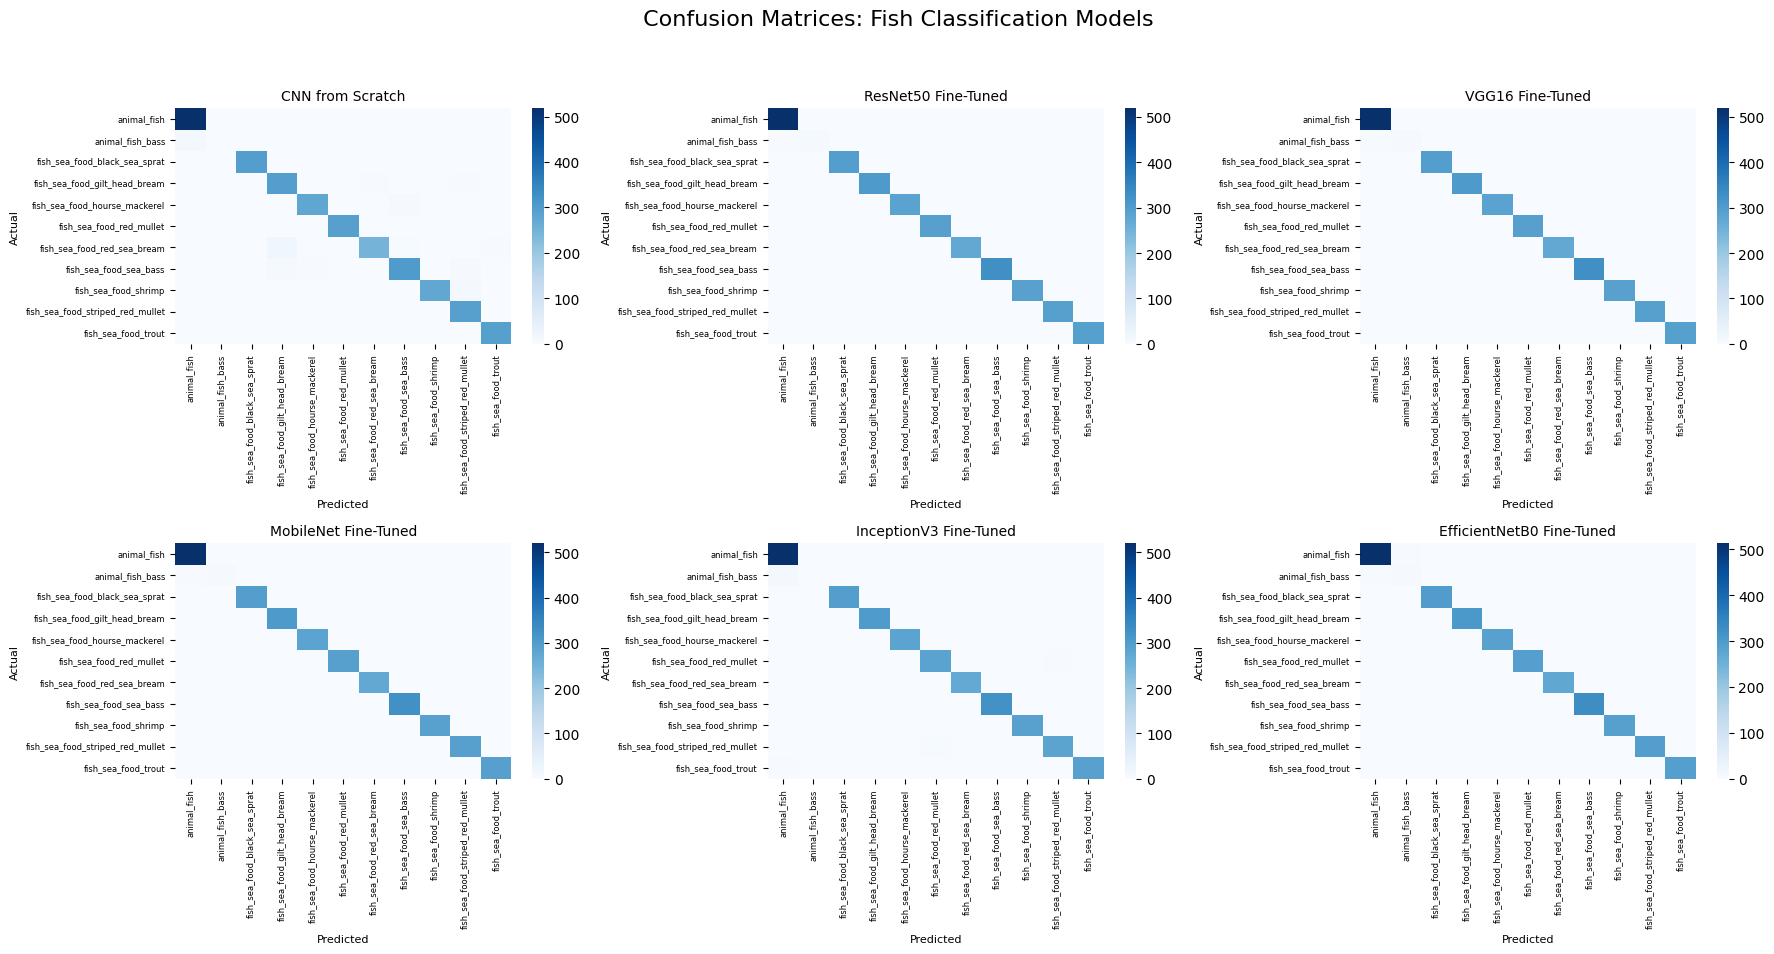

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(" Confusion Matrices: Fish Classification Models", fontsize=16)

models = [
    (model, "CNN from Scratch"),
    (resnet_model, "ResNet50 Fine-Tuned"),
    (vgg_model, "VGG16 Fine-Tuned"),
    (mobilenet_model, "MobileNet Fine-Tuned"),
    (inception_model, "InceptionV3 Fine-Tuned"),
    (effnet_model, "EfficientNetB0 Fine-Tuned")
]

for ax, (model, title) in zip(axes.flat, models):
    plot_conf_matrix(model, test_ds, class_names, title, ax)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [79]:
from sklearn.metrics import classification_report
def print_classification_report(model, model_name, test_ds, class_names):
    y_true = []
    y_pred = []

    for images, labels in test_ds:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    print(f"\n📘 Classification Report for: {model_name}")
    print(classification_report(y_true, y_pred, target_names=class_names))


In [80]:
models = [
    (model, "CNN from Scratch"),
    (resnet_model, "ResNet50 Fine-Tuned"),
    (vgg_model, "VGG16 Fine-Tuned"),
    (mobilenet_model, "MobileNet Fine-Tuned"),
    (inception_model, "InceptionV3 Fine-Tuned"),
    (effnet_model, "EfficientNetB0 Fine-Tuned")
]

for model, name in models:
    print_classification_report(model, name, test_ds, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9

In [81]:
from sklearn.metrics import classification_report
import numpy as np
import os

# Make a directory to store reports
os.makedirs("classification_reports", exist_ok=True)

# Function to save report to a file
def save_report(model, model_name):
    y_true = []
    y_pred = []

    for images, labels in test_ds:
        preds = model.predict(images, verbose=0)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    report = classification_report(y_true, y_pred, target_names=class_names)

    filename = f"classification_reports/{model_name.replace(' ', '_').lower()}_report.txt"
    with open(filename, "w") as f:
        f.write(f"Classification Report for {model_name}\n\n")
        f.write(report)

    print(f" Saved: {filename}")


models = [
    (model, "CNN from Scratch"),
    (resnet_model, "ResNet50 Fine-Tuned"),
    (vgg_model, "VGG16 Fine-Tuned"),
    (mobilenet_model, "MobileNet Fine-Tuned"),
    (inception_model, "InceptionV3 Fine-Tuned"),
    (effnet_model, "EfficientNetB0 Fine-Tuned")
]

# Save all reports
for model, name in models:
    save_report(model, name)


 Saved: classification_reports/cnn_from_scratch_report.txt
 Saved: classification_reports/resnet50_fine-tuned_report.txt
 Saved: classification_reports/vgg16_fine-tuned_report.txt
 Saved: classification_reports/mobilenet_fine-tuned_report.txt
 Saved: classification_reports/inceptionv3_fine-tuned_report.txt
 Saved: classification_reports/efficientnetb0_fine-tuned_report.txt
